In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose

In [5]:
cpi_data=pd.read_csv(r"C:\Users\Mohith Kumar\Desktop\Git Hub Projects\Consumer Price Index Analysis with Python\cpi.csv")

In [9]:
cpi_data.head()

,Sector,Year,Month,Cereals and products,Meat and fish,Egg,Milk and products,Oils and fats,Fruits,Vegetables,...,Housing,Fuel and light,Household goods and services,Health,Transport and communication,Recreation and amusement,Education,Personal care and effects,Miscellaneous,General index
0,Rural,2013,January,107.5,106.3,108.1,104.9,106.1,103.9,101.9,...,NaN,105.5,104.8,104.0,103.3,103.4,103.8,104.7,104.0,105.1
1,Urban,2013,January,110.5,109.1,113.0,103.6,103.4,102.3,102.9,...,100.3,105.4,104.8,104.1,103.2,102.9,103.5,104.3,103.7,104.0
2,Rural+Urban,2013,January,108.4,107.3,110.0,104.4,105.1,103.2,102.2,...,100.3,105.5,104.8,104.0,103.2,103.1,103.6,104.5,103.9,104.6
3,Rural,2013,February,109.2,108.7,110.2,105.4,106.7,104.0,102.4,...,NaN,106.2,105.2,104.4,103.9,104.0,104.1,104.6,104.4,105.8
4,Urban,2013,February,112.9,112.9,116.9,104.0,103.5,103.1,104.9,...,100.4,105.7,105.2,104.7,104.4,103.3,103.7,104.3,104.3,104.7


In [22]:
cpi_data.isnull().sum()

Sector                                   0
Year                                     0
Month                                    0
Cereals and products                     3
Meat and fish                            6
Egg                                      3
Milk and products                        3
Oils and fats                            3
Fruits                                   3
Vegetables                               3
Pulses and products                      3
Sugar and Confectionery                  3
Spices                                   3
Non-alcoholic beverages                  3
Prepared meals, snacks, sweets etc.      6
Food and beverages                       3
Pan, tobacco and intoxicants             6
Clothing                                 6
Footwear                                 6
Clothing and footwear                    6
Housing                                122
Fuel and light                           3
Household goods and services             6
Health     

In [24]:
cpi_data.dropna(inplace=True)

In [26]:
cpi_data.isnull().sum()

Sector                                 0
Year                                   0
Month                                  0
Cereals and products                   0
Meat and fish                          0
Egg                                    0
Milk and products                      0
Oils and fats                          0
Fruits                                 0
Vegetables                             0
Pulses and products                    0
Sugar and Confectionery                0
Spices                                 0
Non-alcoholic beverages                0
Prepared meals, snacks, sweets etc.    0
Food and beverages                     0
Pan, tobacco and intoxicants           0
Clothing                               0
Footwear                               0
Clothing and footwear                  0
Housing                                0
Fuel and light                         0
Household goods and services           0
Health                                 0
Transport and co

In [28]:
cpi_data['Month'] = cpi_data['Month'].str.strip()
cpi_data['Month'] = cpi_data['Month'].replace('Marcrh', 'March')
cpi_data['Date'] = pd.to_datetime(cpi_data['Year'].astype(str) + '-' + cpi_data['Month'], format='%Y-%B')

# Inflation Trend Analysis

In [31]:
#Now, I will analyze the general CPI index over time for the Rural+Urban sector. This trend can help in identifying periods of inflationary spikes or stability:

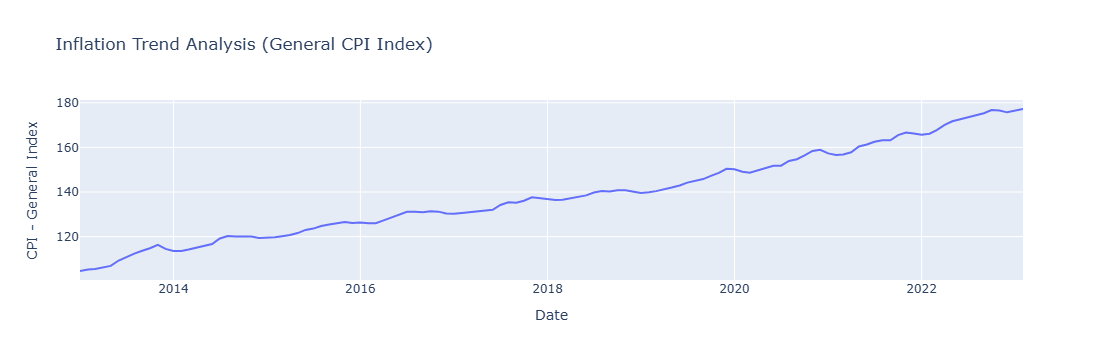

In [33]:
# filter for "Rural+Urban" sector
rural_urban_cpi = cpi_data[cpi_data['Sector'] == 'Rural+Urban'].sort_values('Date')

# inflation trend analysis
fig = px.line(rural_urban_cpi, x='Date', y='General index', title='Inflation Trend Analysis (General CPI Index)')
fig.update_layout(xaxis_title='Date', yaxis_title='CPI - General Index')
fig.show()

# Seasonal and Cyclical Patterns

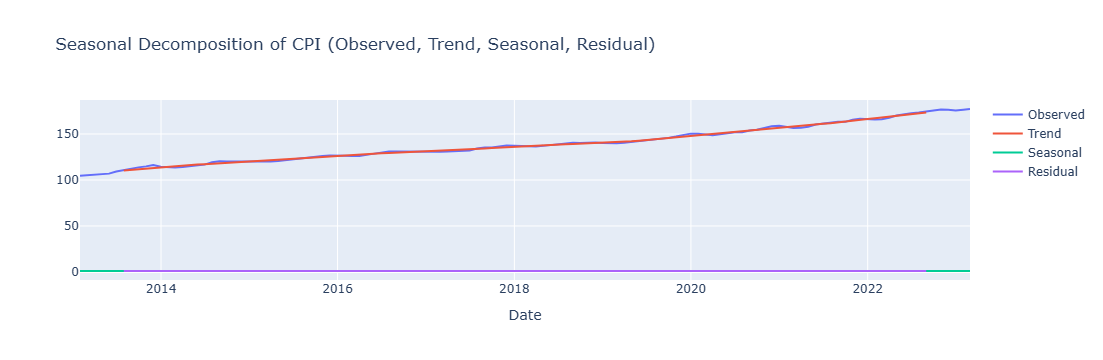

In [37]:
# seasonal and cyclical patterns
rural_urban_cpi.set_index('Date', inplace=True)
monthly_cpi = rural_urban_cpi['General index'].resample('M').mean().interpolate(method='linear')
decomposition = seasonal_decompose(monthly_cpi, model='multiplicative', period=12)
fig = go.Figure()
fig.add_trace(go.Scatter(x=decomposition.observed.index, y=decomposition.observed, mode='lines', name='Observed'))
fig.add_trace(go.Scatter(x=decomposition.trend.index, y=decomposition.trend, mode='lines', name='Trend'))
fig.add_trace(go.Scatter(x=decomposition.seasonal.index, y=decomposition.seasonal, mode='lines', name='Seasonal'))
fig.add_trace(go.Scatter(x=decomposition.resid.index, y=decomposition.resid, mode='lines', name='Residual'))
fig.update_layout(title='Seasonal Decomposition of CPI (Observed, Trend, Seasonal, Residual)', xaxis_title='Date')
fig.show()

# Comparison Across Sectors or Regions

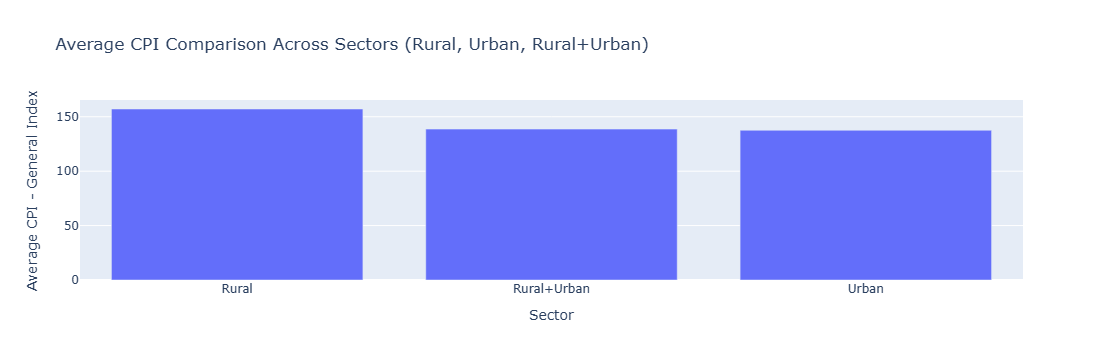

In [45]:
# comparison across sectors or regions
sector_cpi_means = cpi_data.groupby(['Sector'])['General index'].mean().reset_index()
fig = px.bar(sector_cpi_means, x='Sector', y='General index', title='Average CPI Comparison Across Sectors (Rural, Urban, Rural+Urban)')
fig.update_layout(xaxis_title='Sector', yaxis_title='Average CPI - General Index')
fig.show()

# Correlation with Economic Indicators

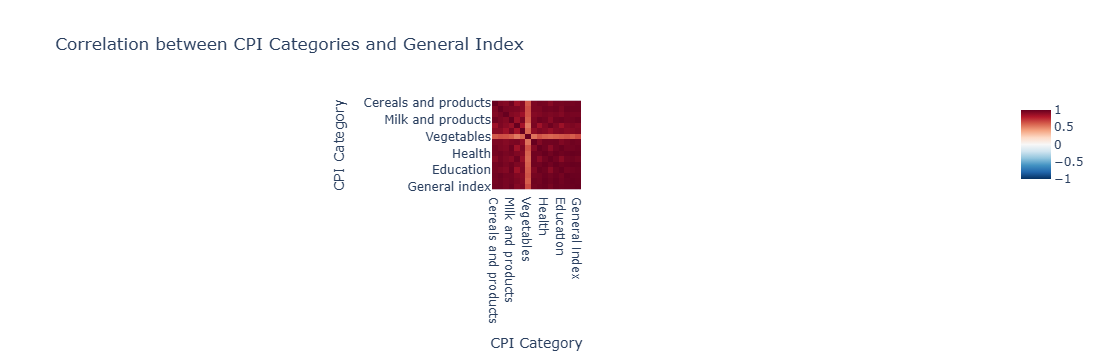

In [54]:
# replace non-numeric values with NaN and ensure all columns are numeric
cpi_categories = cpi_data[['Cereals and products', 'Meat and fish', 'Egg', 'Milk and products', 'Oils and fats',
                           'Fruits', 'Vegetables', 'Fuel and light', 'Housing', 'Health', 'Transport and communication',
                           'Recreation and amusement', 'Education', 'Personal care and effects', 'Miscellaneous', 'General index']]
cpi_categories = cpi_categories.apply(pd.to_numeric, errors='coerce')  # convert to numeric
# calculate the correlation matrix
correlation_matrix = cpi_categories.corr()
# plot the correlation matrix as a heatmap
fig = px.imshow(correlation_matrix, text_auto=True, color_continuous_scale='RdBu_r', zmin=-1, zmax=1,
                title='Correlation between CPI Categories and General Index')
fig.update_layout(xaxis_title='CPI Category', yaxis_title='CPI Category')
fig.show()

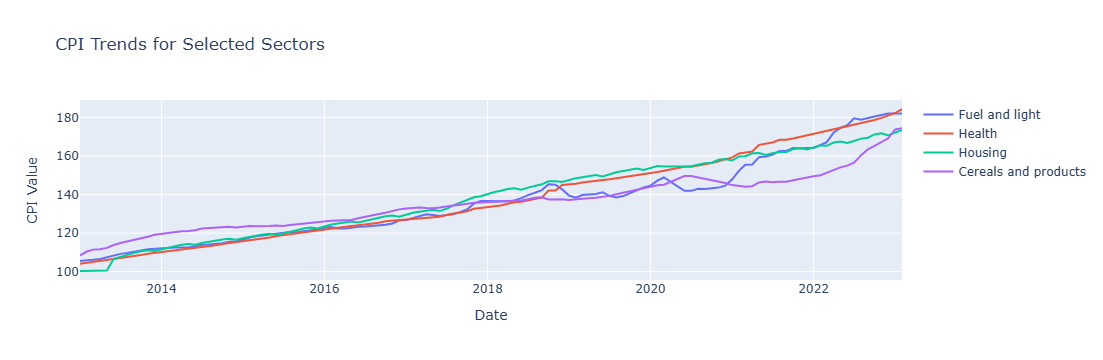

In [56]:
# CPI and specific sector analysis
sectors_to_analyze = ['Fuel and light', 'Health', 'Housing', 'Cereals and products']
sector_data = rural_urban_cpi[sectors_to_analyze].fillna(method='ffill').reset_index()

fig = go.Figure()
for sector in sectors_to_analyze:
    fig.add_trace(go.Scatter(x=sector_data['Date'], y=sector_data[sector], mode='lines', name=sector))
fig.update_layout(title='CPI Trends for Selected Sectors', xaxis_title='Date', yaxis_title='CPI Value')
fig.show()

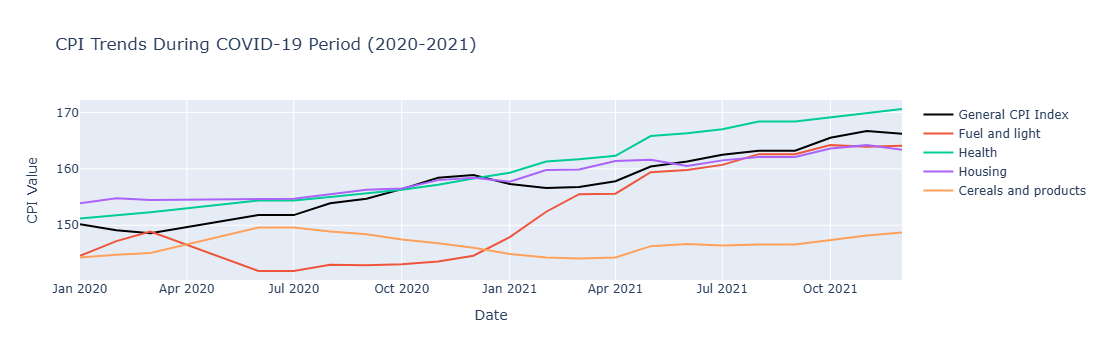

In [64]:
# event-based analysis (COVID-19 Period)
covid_period = rural_urban_cpi[(rural_urban_cpi.index >= '2020-01-01') & (rural_urban_cpi.index <= '2021-12-31')][sectors_to_analyze + ['General index']].fillna(method='ffill').reset_index()

fig = go.Figure()
fig.add_trace(go.Scatter(x=covid_period['Date'], y=covid_period['General index'], mode='lines', name='General CPI Index', line=dict(width=2, color='black')))
for sector in sectors_to_analyze:
    fig.add_trace(go.Scatter(x=covid_period['Date'], y=covid_period[sector], mode='lines', name=sector))
fig.update_layout(title='CPI Trends During COVID-19 Period (2020-2021)', xaxis_title='Date', yaxis_title='CPI Value')
fig.show()